In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
trash = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')
trash.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [3]:
trash.columns

Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

Changing the addresses to all share the same layout.

In [4]:
trash['Incident Address'] = trash['Incident Address'].str.title()
trash.head(3)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923


In [5]:
trash['Request'].value_counts()

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

Changing the Zip Codes to drop the 0 at the end.

In [6]:
trash['Zip Code'] = trash['Zip Code'].astype(str)

In [7]:
trash['Zip Code'] = trash['Zip Code'].str[:5]

In [8]:
trash.head(3)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923


Looking for the keyword "miss" in the description column

In [9]:
trash['Description'] = trash['Description'].str.lower()

In [10]:
trash.head(3)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923


In [11]:
trash['Miss'] = (trash['Description'].str.contains('miss', case = False) |
                        trash['Request'].str.contains('miss', case = False))
trash.head(3)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Miss
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,False
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,True
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,True


In [12]:
miss_trash = trash.loc[trash.Miss == True].reset_index(drop=True)
miss_trash.head(3)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Miss
0,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,True
1,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,True
2,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 Old Matthews Rd,37207,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,True


Changing the addresses to make them easier to count

In [13]:
miss_trash['Short Address']=miss_trash['Incident Address'].str.split(',', expand=True)[0]
miss_trash.head(3)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,Miss,Short Address
0,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,True,4028 Clarksville Pike
1,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,curb/trash miss tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,True,6528 Thunderbird Dr
2,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 Old Matthews Rd,37207,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,True,2603 Old Matthews Rd


Count how many times each address shows up in the data set. Sum up the total amount of Fees per Short Address.

In [14]:
miss_trash['Short Address'].value_counts()

Short Address
110 George L Davis Blvd     28
5135 Hickory Hollow Pkwy    23
12546 Old Hickory Blvd      21
6007 Obrien Ave             20
3710 N Natchez Ct           20
                            ..
266 Sunrise Ave              1
403 Merritt Ave              1
2807 Sherbourne Ave          1
1737 Hillmont Dr             1
707 Estes Rd                 1
Name: count, Length: 11181, dtype: int64

In [15]:
fee=miss_trash['Short Address'].value_counts()*200-200

In [16]:
fee.sum()

np.int64(1304000)

What were total missed pickup by route?

In [17]:
miss_route=miss_trash['Trash Route'].value_counts()

In [18]:
miss_route

Trash Route
4504     328
3302     291
4404     255
9303     245
1303     240
        ... 
2405S      3
3303S      2
2505S      2
4201S      2
1502S      1
Name: count, Length: 172, dtype: int64

How does Metro compare to other contractors?

In [19]:
miss_trash['Trash Hauler'] = miss_trash['Trash Hauler'].str.title()

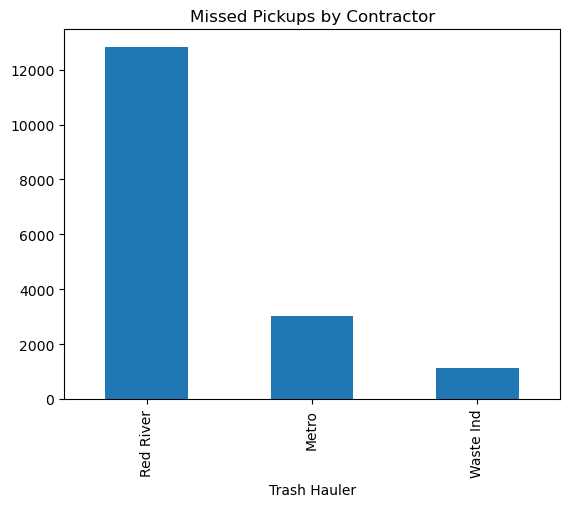

In [20]:
miss_trash['Trash Hauler'].value_counts().plot(kind = 'bar')
plt.title('Missed Pickups by Contractor');

Trash missed by Zip Code

In [21]:
miss_trash['Zip Code'].value_counts()

Zip Code
37013    2092
37211    2005
37215    1295
37205    1260
37209    1199
37207    1088
37115    1082
37206    1060
37208     900
37218     881
37214     880
37217     736
37216     721
37204     570
37212     500
37210     470
37203     345
37220     250
37027     146
nan        60
37189      56
37221      46
37201      29
37219      27
37076       4
37086       3
37138       3
37213       1
37228       1
Name: count, dtype: int64

Geospatial analysis goes down here